
# MOGUNTIA exercises

---------

<FONT color=red>
## A source over the ocean
</FONT color=red>

----------



##### Maarten Krol, October 2015
##### version 1.0

### Goal:

Learn to use MOGUNTIA, to manipulate input files, to run, and to use the analysis program.

### Introduction

To learn using MOGUNTIA, we start with a simple simulation. A tracer will be emitted over the oceans. The lifetime of the tracer will be set to one year, and its global distribution will be analyzed. Also, it will be analyzed how fast a steady state distribution is obtained. This information is supplied to **MOGUNTIA** by an input file, that can be modified for your own needs.

> General information on the **MOGUNTIA** model, and how to define its input (i.e. tell the model what to simulate, what output to produce, etc.) can be found <a href="http://www.staff.science.uu.nl/~krol0101/moguntia/MANUAL/moguntia.doc/">here</a>. Important: Whenever a line in the input file starts with a **blank**, the line in simply skipped. This allows easy on-off switching of commands

> * Use *File* in the menu above to open the precooked input file **Exercise1.in**
> * Try to understand its contents

To run the moguntia model with this input file, do the following:

>  * select the cell below, and press **Shift-Enter**. This will connect to the so-called ***Ipython Kernel*** which sets-up interactive windows.

        
>  * Select the input file **Exercise1.in**
>  * Press the button **Run Moguntia**

This will now run the **MOGUNTIA** program. This may take a while. When the simulation is finished, the output will appear as text.

>>  Use is made of the **Python** language. **Python** can import functionality, provides plotting routines, exchange with the operating system, etc. The command below: "xlf = CMoguntia()", starts a Moguntia instance, and the variable **xlf** carries the necessary information to the plotting program (see later). For instance, you can run and analyze two different Moguntia simulations, by starting two Moguntia instances:
        
                xlf1 = CMoguntia()
                xlf2 = Cmoguntia()



In [1]:
%pylab inline
from pylab import *
from Cmoguntia import *
xlf = CMoguntia()

 HDF read asland returns: 0
  Pressure (hPa) - Height (m)
    1000.0        0.
     900.0      909.
     800.0     1904.
     700.0     3005.
     600.0     4241.
     500.0     5658.
     400.0     7326.
     300.0     9375.
     200.0    12079.
     100.0    16245.
 Simulation year: 1987
 Simulation year: 1988
 Simulation year: 1989
itransport 2490370



### Analyze the output

The next step is to analyze the output of the simulation. 

> * Select the cell below and press **Shift-Enter**.
This will create a number of analysis widgets.
> * First plot the station output by selecting output file **ex1.stations**
> * Select one or more stations from the list **Stations** (use shift and control keys to slect multiple files)
> * Press the button **Make Plots**. A plot is created. When needed, these plots can be copied to e.g. a word-document

The emission strength defined in the input file leads to very small concentrations in the atmosphere. For presenting the results, conversion to other units can be performed easily.

> * Convert the concentrations from **mol/mol** to parts per trillion (**ppt**) and re-plot
> * Test the use of the tick-boxes **grid** and **automatic**

The button **overplot** is of no use here. It is only useful when atmospheric measurements are available.

During the simulation other output was requested by the following lines in **Exercise1.in**:

        OUTPUT MONTHLY LATLON 1000HPA
        OUTPUT MONTHLY LATLON 500HPA
        OUTPUT MONTHLY ZONAL_AVERAGE

These lines generated files with names **ex1ll.yyyy_mm**, and **ex1za.yyyy_mm** with **yyyy** the year, and **mm** the month. Latitude-longitude output may be requested at various pressure levels.

> * Select several input files, and press **Make Plots**
>>   Note that the plotting of many latitude-longitude figures takes a considerable amount of time
> * Give all the plots a similar concentration range by deselecting **automatic**
>> With contour plots, you can manupulate the minimum, maximum, and the number of contour levels
> * Can you roughly explain the observed tracer distribution?

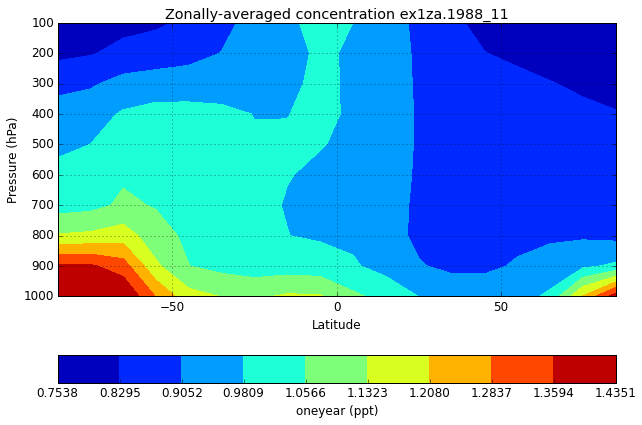

In [2]:
from plot_moguntia_new import *
pm = plot_moguntia_new(xlf)

### Exercise: The lifetime concept

From the output at e.g the stations it is clear that after two years of simulation the tracer distribution is still not in steady state. 
> * Create a new input file in which the lifetime of the tracer is changed to a value that ensures steady state after 2 years of simulation.
> * Run for at least 3 years to check if steady state in reached.
> * Check steady state by plotting the station output
> * Check steady state also by comparing the zonally averaged tracer distribution of two subsequent years with fixed contour intervals (e.g. decemebr 1988 and december 1989)
> * Make an educated guess of the global mean concentration (in **ppt**)
> * From this guess, determine the emission by using the (global) steady state formula:

\begin{eqnarray}
\frac{dC}{dt} = 0 = E - L.C \\
{\rm with} \\
\end{eqnarray}

> E = global mean emission (molecules.cm$^{-2}$.s$^{-1}$) 

> L = loss rate (s$^{-1}$)

> C = Concentration converted to molecules.cm$^{-2}$ 

> * Check if the global mean concentration corresponds to the global mean emission rate in the input file (10$^6$ molecules.cm$^{-2}$.s$^{-1}$ over sea, and a sea fraction of $\frac{2}{3}$)
>> Hint: the model air pressure is 900 hPa (1000-100 hPa is the model domain). Convert 900 hPa to the number of air molecules per square centimeter: 

\begin{equation}
1\ mol = 6.022.10^{23}\ molecules = 28.5\  g
\end{equation}
\begin{equation}
1\ Pa = 1 \frac{N}{m^2} = 1/9.8 \frac{kg}{m^2} = \frac{0.1}{9.8}\ \frac{g}{{cm}^2}
\end{equation}


>> 'number of tracer molecules' = 'mixing ratio' times 'number of air molecules'.




In [4]:
%pylab inline
from pylab import *
from Cmoguntia import *
xlf2 = CMoguntia()

 HDF read asland returns: 0
  Pressure (hPa) - Height (m)
    1000.0        0.
     900.0      909.
     800.0     1904.
     700.0     3005.
     600.0     4241.
     500.0     5658.
     400.0     7326.
     300.0     9375.
     200.0    12079.
     100.0    16245.
 Simulation year: 1987
 Simulation year: 1988
 Simulation year: 1989
 Simulation year: 1990
itransport 2490370



None

None

None

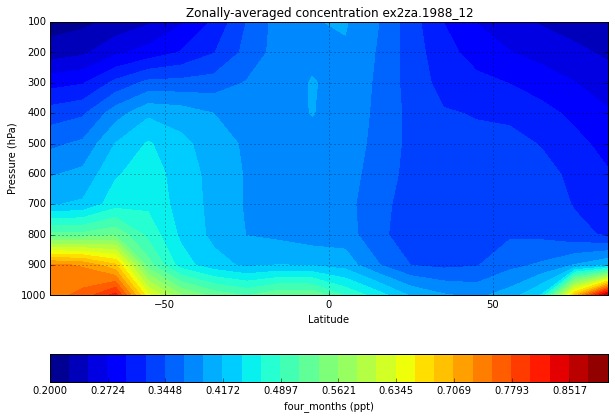

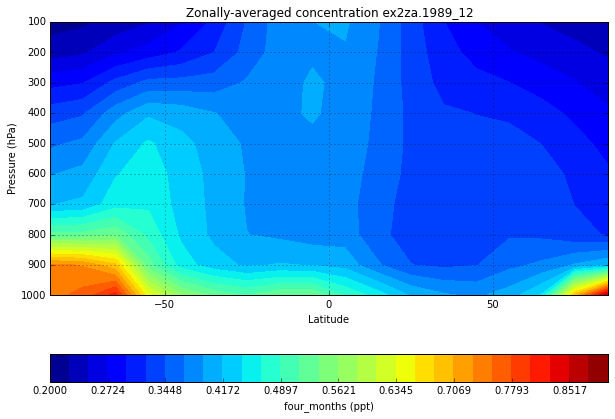

In [5]:
from plot_moguntia_new import *
pm2 = plot_moguntia_new(xlf2)

### Investigate the winds in MOGUNTIA

The meteo in MOGUNTIA is provided by the ECMWF weather model. A weather model assimilates observations in combination with a numerical model (describing the physical processes in the atmosphere) to produce a weather forecast (e.g. 2x a day at 00-UTC and 12-UTC). This is an representation of the atmosperic state (temperature, moisture) and its motions (winds) that are used in MOGUNTIA to transport "tracers", such as CO and CO$_2$. 

MOGUNTIA is however relatively simple in its approach. The winds are averaged over a whole month of the year 1987. So the winds in MOGUNTIA are not representing day to day vaiability and are in principle not valid to simulate years other than 1987. However, 1987 was a rather normal year, and the monthly averaged winds still give a good representation of the month-to-month variation in the atmosphere, such as the monsoon and the atmospheric jet-stream.

The small program below reads in the MOGUNTIA winds and lets you explore the wind fields per month, atmospheric layer (1000 - 100 hPa) and as pressure-latitude/longitude plots.

Address the following issues:

> * How do the horizantal wind speeds vary with height? Where is the maximum wind speed?
> * Can you identiy the jet-stream?
> * How does this jet differ between the Northern and Southern hemisphere?
> * Can you see how the Hadley circulation changes thoughout the year?
> * Where and when does the monsoon circulation show up?



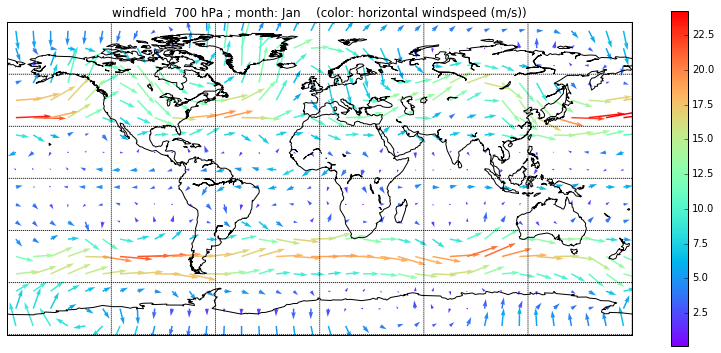

In [1]:
%matplotlib inline

from Cwind import *
xwind = Cwind()
a = interact(xwind.plot_wind, 
         action=xwind.action,
         month=xwind.m_slider,
         lon=xwind.lon_slider,
         lat=xwind.lat_slider,
         pres=xwind.pres_slider)

### End of exercise "A source over the ocean"